In [34]:
from NNScratchLib.layers import NNLayer
from NNScratchLib.models import NNMultiClass
from NNScratchLib.functions import activation_functions as af

import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

### Definición de la red

In [35]:
nn = NNMultiClass.NeuralNetwork()
nn.set(NNLayer.Layer(4, 10, activation=af.sigmoid, activation_derivate=af.sigmoid_derivate))
nn.set(NNLayer.Layer(10, 3, activation=af.softmax, activation_derivate=None))

### Dataset de Iris

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

In [38]:
def accuracy(Y, Y_pred):
    accuracy = 0
    for y, Y_pred in zip(Y, Y_pred):
        if np.argmax(y) == np.argmax(Y_pred):
            accuracy += 1

    return accuracy / len(Y)

In [39]:
# train
for i in range(300):
    for j in range(len(X)):
        nn.backpropagation(X[j], y[j], lr=0.0001)

    if i%10 == 0:
        Y_pred = [nn.feedfoward(x) for x in X_test]
        acc = accuracy(y_test, Y_pred)
        print(f'epoch {i:3} - accuracy {acc:.5f}')


epoch   0 - accuracy 0.26667
epoch  10 - accuracy 0.26667
epoch  20 - accuracy 0.26667
epoch  30 - accuracy 0.26667
epoch  40 - accuracy 0.26667
epoch  50 - accuracy 0.26667
epoch  60 - accuracy 0.40000
epoch  70 - accuracy 0.50000
epoch  80 - accuracy 0.50000
epoch  90 - accuracy 0.56667
epoch 100 - accuracy 0.63333
epoch 110 - accuracy 0.63333
epoch 120 - accuracy 0.66667
epoch 130 - accuracy 0.70000
epoch 140 - accuracy 0.76667
epoch 150 - accuracy 0.76667
epoch 160 - accuracy 0.76667
epoch 170 - accuracy 0.80000
epoch 180 - accuracy 0.80000
epoch 190 - accuracy 0.80000
epoch 200 - accuracy 0.80000
epoch 210 - accuracy 0.83333
epoch 220 - accuracy 0.83333
epoch 230 - accuracy 0.83333
epoch 240 - accuracy 0.83333
epoch 250 - accuracy 0.83333
epoch 260 - accuracy 0.83333
epoch 270 - accuracy 0.90000
epoch 280 - accuracy 0.90000
epoch 290 - accuracy 0.90000


# Red Neuronal Para Clasificar el Dataset de MNIST

In [40]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

### Definimos la red

In [41]:
nn = NNMultiClass.NeuralNetwork()
nn.set(NNLayer.Layer(784, 10, activation=af.sigmoid, activation_derivate=af.sigmoid_derivate))
nn.set(NNLayer.Layer(10, 10, activation=af.softmax, activation_derivate=None))

### Dataset de MNIST

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [43]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Entrenamiento de la red

In [44]:
print("accuracy before training: ", accuracy(y_test, [nn.feedfoward(x) for x in x_test]))

for i in range(10):
    for j in range(len(x_train)):
        nn.backpropagation(x_train[j], y_train[j], lr=0.01)

    Y_pred = [nn.feedfoward(x) for x in x_test]
    acc = accuracy(y_test, Y_pred)
    print(f'epoch {i:3} - accuracy {acc:.5f}')


accuracy before training:  0.0904
epoch   0 - accuracy 0.81960
epoch   1 - accuracy 0.84580
epoch   2 - accuracy 0.82670
epoch   3 - accuracy 0.90030
epoch   4 - accuracy 0.87870
epoch   5 - accuracy 0.87360
epoch   6 - accuracy 0.87680
epoch   7 - accuracy 0.88920
epoch   8 - accuracy 0.84590
epoch   9 - accuracy 0.89890


In [45]:
nn.layers[0].weights

array([[-1.84592773, -0.30279043,  0.14415084, ..., -0.19101488,
        -0.61538592,  0.17460146],
       [-0.52851419, -1.97270165, -0.11246485, ...,  1.26311316,
         1.11364483,  0.49344388],
       [ 1.01994732, -0.92885313,  0.95434211, ...,  0.78746092,
        -0.77576682,  1.29880606],
       ...,
       [ 0.61589319, -0.67817547,  0.36041618, ...,  0.51679743,
         0.4763185 ,  0.22836432],
       [-0.33225798,  0.1942475 , -0.02611053, ...,  0.08859946,
        -2.42695952,  0.24306251],
       [ 0.35577358, -0.8675759 , -0.59941115, ..., -0.13521073,
         1.70729292,  1.90463187]])

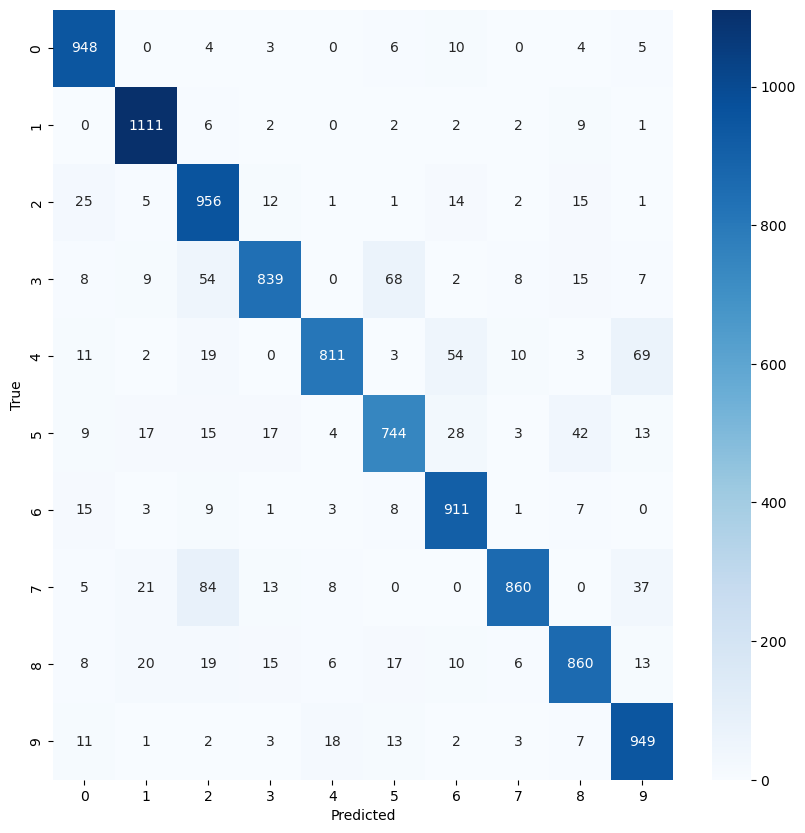

In [47]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()